<a href="https://colab.research.google.com/github/Jiayi1827/STAT-430/blob/main/888.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Part 1
Provide summary of the data that you’re going to use. Provide visual summary and interpretation.

In [30]:
weather_data=pd.read_csv('/content/drive/MyDrive/STAT 430 Time Series/HW4/weather-summary.csv')
weather_data

,Year,Month,Maximum Temperature: Degrees Fahrenheit,Minimum Temperature: Degrees Fahrenheit,Average Temperature: Degrees Fahrenheit,Total Precipitation: Inches,Average Wind Speed: Miles per Hour,Maximum Wind Speed: Miles per Hour
0,2015,January,48.4,-7.2,25.4,1.69,5.1,34.6
1,2015,February,55.4,-15.6,20.0,1.60,5.8,30.8
2,2015,March,75.4,-8.0,38.2,1.68,5.0,28.9
3,2015,April,79.8,28.4,54.6,3.72,5.7,30.6
4,2015,May,87.1,40.2,66.1,6.07,3.7,26.9
...,...,...,...,...,...,...,...,...
91,2022,August,93.9,57.5,73.4,4.86,2.4,24.8
92,2022,September,94.9,41.3,66.6,4.64,2.4,33.0
93,2022,October,79.4,28.1,53.4,2.33,3.2,24.1
94,2022,November,77.6,11.4,41.4,1.83,5.1,29.3


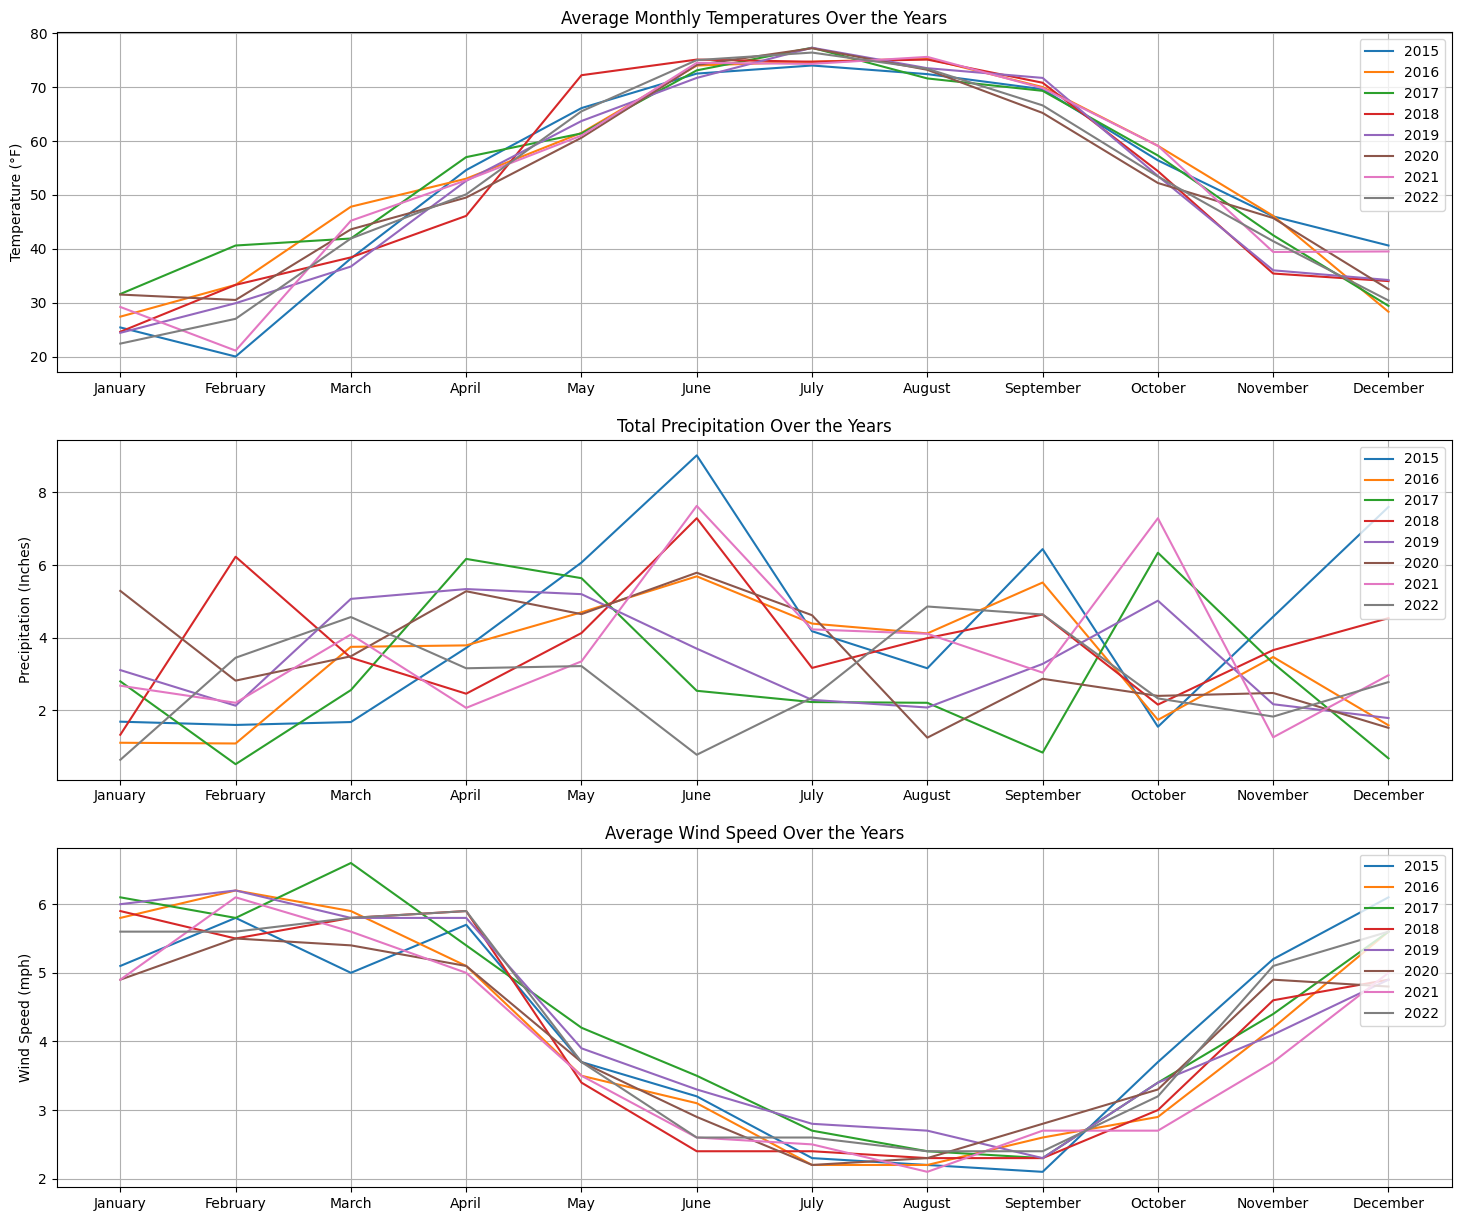

In [4]:
# Setting up the figure and subplots
plt.figure(figsize=(18, 15))

# Plotting Average Monthly Temperatures over the years
plt.subplot(3, 1, 1)
for year in weather_data['Year'].unique():
    yearly_data = weather_data[weather_data['Year'] == year]
    plt.plot(yearly_data['Month'], yearly_data['Average Temperature: Degrees Fahrenheit'], label=year)

plt.title("Average Monthly Temperatures Over the Years")
plt.ylabel("Temperature (°F)")
plt.grid(True)
plt.legend(loc="upper right")

# Plotting Total Precipitation over the years
plt.subplot(3, 1, 2)
for year in weather_data['Year'].unique():
    yearly_data = weather_data[weather_data['Year'] == year]
    plt.plot(yearly_data['Month'], yearly_data['Total Precipitation: Inches'], label=year)
plt.title("Total Precipitation Over the Years")
plt.ylabel("Precipitation (Inches)")
plt.grid(True)
plt.legend(loc="upper right")

# Plotting Wind Speed over the years
plt.subplot(3, 1, 3)
for year in weather_data['Year'].unique():
    yearly_data = weather_data[weather_data['Year'] == year]
    plt.plot(yearly_data['Month'], yearly_data['Average Wind Speed: Miles per Hour'], label=year)
plt.title("Average Wind Speed Over the Years")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
plt.legend(loc="upper right")


plt.show()


**Average Monthly Temperatures Over the Years:**
There is a clear seasonal pattern in each yaer, with temperatures being higher from May to August and lower at the start and end of the year. The general trend remains consistent, with some variations in temperatures.

**Total Precipitation Over the Years:**
There are variabilities in precipitation levels across months and years.

**Average Wind Speed Over the Years:**
There is a relatively clear seasonal pattern for wind seed in each yaer, with fluctuations across months.




# Part 2.
Use parametric regression methods to predict monthly temperature of 2023 October, November, and December.

1. Linear regression with Average temperature, total percipitation, average wind speed.

In [5]:

# Creating the lagged features for average temperature
weather_data["Lag_1"] = weather_data["Average Temperature: Degrees Fahrenheit"].shift(1)
weather_data["Lag_2"] = weather_data["Average Temperature: Degrees Fahrenheit"].shift(2)
weather_data["Lag_3"] = weather_data["Average Temperature: Degrees Fahrenheit"].shift(3)

# Dropping the initial rows where the lagged features are NaN
weather_data = weather_data.dropna()

# Feature Selection
selected_features = [
    "Total Precipitation: Inches",
    "Average Wind Speed: Miles per Hour",
    "Lag_1",
    "Lag_2",
    "Lag_3"
]

# Defining the target variable
y_corrected = weather_data["Average Temperature: Degrees Fahrenheit"]

# Splitting the data
X_selected_corrected = weather_data[selected_features]
X_train_selected_corrected, X_test_selected_corrected, y_train_corrected, y_test_corrected = train_test_split(X_selected_corrected, y_corrected, test_size=0.2, random_state=42)

# Initializing and Training the linear regression model
model_selected_corrected = LinearRegression()
model_selected_corrected.fit(X_train_selected_corrected, y_train_corrected)

# Evaluating the model
y_pred_selected_corrected = model_selected_corrected.predict(X_test_selected_corrected)
rmse_selected_corrected = mean_squared_error(y_test_corrected, y_pred_selected_corrected, squared=False)

# Forecasting for October, November, and December of 2023
forecast_data_selected_corrected = weather_data[selected_features].iloc[-3:].reset_index(drop=True)
predicted_temperatures_selected_corrected = model_selected_corrected.predict(forecast_data_selected_corrected)
months_to_predict = ["October", "November", "December"]
predictions_2023_selected_corrected = dict(zip(months_to_predict, predicted_temperatures_selected_corrected))

rmse_selected_corrected, predictions_2023_selected_corrected

(5.668306188818722,
 {'October': 55.55120551848695,
  'November': 38.074222225475694,
  'December': 31.03747007119274})

2. Linear regression with polynomila variables: Lag 1, total percipitation, and average wind speed.

In [6]:
# Selecting features for polynomial transformation
features_for_poly = ["Average Wind Speed: Miles per Hour", "Total Precipitation: Inches", "Lag_1"]
X_poly_input = weather_data[features_for_poly]

# Generating 2nd-degree polynomial features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_poly_input)

# Splitting the data with polynomial features
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y_corrected, test_size=0.2, random_state=42)

# Training a linear regression model with the polynomial features
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train_poly)

# Evaluating the model performance on the test set
y_pred_poly = model_poly.predict(X_test_poly)
rmse_poly = mean_squared_error(y_test_poly, y_pred_poly, squared=False)

rmse_poly


9.837791313139894

In [7]:
# Generating polynomial features for the data corresponding to Oct, Nov, and Dec 2022
forecast_data_poly_input = weather_data[features_for_poly].iloc[-3:].reset_index(drop=True)
forecast_data_poly = poly.transform(forecast_data_poly_input)

# Predicting temperatures for October, November, and December 2023 using the polynomial model
predicted_temperatures_poly = model_poly.predict(forecast_data_poly)

# Combining the months and their predicted temperatures for the polynomial model
predictions_2023_poly = dict(zip(months_to_predict, predicted_temperatures_poly))

predictions_2023_poly


{'October': 60.7952345813943,
 'November': 39.783158167505945,
 'December': 37.4038601059618}

# Part 3
Use non-parametric regression methods to predict monthly temperature of 2023 October, November, and December.

1. K-NN

In [53]:
# I choose to only creat lag features for avg temp as past temperatures might influence the target variable (future temp).

X=weather_data.copy()

# Creating lag features
X["Lag_1"] = X["Average Temperature: Degrees Fahrenheit"].shift(1)
X["Lag_2"] = X["Average Temperature: Degrees Fahrenheit"].shift(2)
X["Lag_3"] = X["Average Temperature: Degrees Fahrenheit"].shift(3)

X

,Year,Month,Maximum Temperature: Degrees Fahrenheit,Minimum Temperature: Degrees Fahrenheit,Average Temperature: Degrees Fahrenheit,Total Precipitation: Inches,Average Wind Speed: Miles per Hour,Maximum Wind Speed: Miles per Hour,Lag_1,Lag_2,Lag_3
0,2015,January,48.4,-7.2,25.4,1.69,5.1,34.6,NaN,NaN,NaN
1,2015,February,55.4,-15.6,20.0,1.60,5.8,30.8,25.4,NaN,NaN
2,2015,March,75.4,-8.0,38.2,1.68,5.0,28.9,20.0,25.4,NaN
3,2015,April,79.8,28.4,54.6,3.72,5.7,30.6,38.2,20.0,25.4
4,2015,May,87.1,40.2,66.1,6.07,3.7,26.9,54.6,38.2,20.0
...,...,...,...,...,...,...,...,...,...,...,...
91,2022,August,93.9,57.5,73.4,4.86,2.4,24.8,76.4,75.0,65.5
92,2022,September,94.9,41.3,66.6,4.64,2.4,33.0,73.4,76.4,75.0
93,2022,October,79.4,28.1,53.4,2.33,3.2,24.1,66.6,73.4,76.4
94,2022,November,77.6,11.4,41.4,1.83,5.1,29.3,53.4,66.6,73.4


In [54]:
# Dropping rows with NaN values after creating lag features
X = X.dropna()

# Preparing the data for k-NN with extended features
features_knn_extended = ["Total Precipitation: Inches", "Average Wind Speed: Miles per Hour", "Lag_1", "Lag_2", "Lag_3"]
X_knn_extended = X[features_knn_extended]
y_knn = X["Average Temperature: Degrees Fahrenheit"]


In [55]:
X_knn_extended

,Total Precipitation: Inches,Average Wind Speed: Miles per Hour,Lag_1,Lag_2,Lag_3
3,3.72,5.7,38.2,20.0,25.4
4,6.07,3.7,54.6,38.2,20.0
5,9.02,3.2,66.1,54.6,38.2
6,4.18,2.3,72.5,66.1,54.6
7,3.16,2.2,74.0,72.5,66.1
...,...,...,...,...,...
91,4.86,2.4,76.4,75.0,65.5
92,4.64,2.4,73.4,76.4,75.0
93,2.33,3.2,66.6,73.4,76.4
94,1.83,5.1,53.4,66.6,73.4


In [56]:
# Excluding the last 3 rows for the train-test split (Oct, Nov, Dec in 2022)
X_knn_without_last3 = X_knn_extended.iloc[:-3]
y_knn_without_last3 = y_knn.iloc[:-3]

# Splitting the data (excluding the last 3 rows)
X_train_knn_extended, X_test_knn_extended, y_train_knn, y_test_knn = train_test_split(X_knn_without_last3, y_knn_without_last3, test_size=0.2, random_state=42)

# Training the k-NN regressor
knn_regressor_extended = KNeighborsRegressor(n_neighbors=5)
knn_regressor_extended.fit(X_train_knn_extended, y_train_knn)

# Predicting and evaluating on the test set
y_pred_knn_extended = knn_regressor_extended.predict(X_test_knn_extended)
rmse_knn_extended = mean_squared_error(y_test_knn, y_pred_knn_extended, squared=False)

# Preparing data for October, November, and December 2023 predictions (using the last 3 rows)
forecast_data_knn_extended = X_knn_extended.iloc[-3:]

# Predicting temperatures for October, November, and December 2023
predicted_temperatures_knn_extended = knn_regressor_extended.predict(forecast_data_knn_extended)
predictions_2023_knn_extended_modified = dict(zip(["October 2023", "November 2023", "December 2023"], predicted_temperatures_knn_extended))

rmse_knn_extended, predictions_2023_knn_extended_modified


(4.970597996664429,
 {'October 2023': 54.760000000000005,
  'November 2023': 41.8,
  'December 2023': 34.06})

In [63]:
# Predict iteratively

# Predicting for October 2023 using most recent data (i.e., September 2022)
october_input = [[X_knn_extended["Total Precipitation: Inches"].iloc[-1], X_knn_extended["Average Wind Speed: Miles per Hour"].iloc[-1], y_knn.iloc[-1], y_knn.iloc[-2], y_knn.iloc[-3]]]
october_2023_prediction = knn_regressor_extended.predict(october_input)

# Predicting for November 2023
november_input = [[X_knn_extended["Total Precipitation: Inches"].iloc[-1], X_knn_extended["Average Wind Speed: Miles per Hour"].iloc[-1], october_2023_prediction[0], y_knn.iloc[-1], y_knn.iloc[-2]]]
november_2023_prediction = knn_regressor_extended.predict(november_input)

# Predicting for December 2023
december_input = [[X_knn_extended["Total Precipitation: Inches"].iloc[-1], X_knn_extended["Average Wind Speed: Miles per Hour"].iloc[-1], november_2023_prediction[0], october_2023_prediction[0], y_knn.iloc[-1]]]
december_2023_prediction = knn_regressor_extended.predict(december_input)

predictions_2023_knn = {
    "October 2023": october_2023_prediction[0],
    "November 2023": november_2023_prediction[0],
    "December 2023": december_2023_prediction[0]
}

predictions_2023_knn


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


{'October 2023': 28.259999999999998,
 'November 2023': 37.019999999999996,
 'December 2023': 46.739999999999995}

In [58]:
december_input_selected

[array([ 4.09,  5.6 , 43.62, 37.74, 32.5 ])]

In [65]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

# Given our earlier data preparation
features_knn = ["Total Precipitation: Inches", "Average Wind Speed: Miles per Hour", "Lag_1", "Lag_2", "Lag_3"]
X_knn = X[features_knn]
y_knn = X["Average Temperature: Degrees Fahrenheit"]

# Excluding the last 3 rows (months) for the train-test split
X_knn_without_last3 = X_knn.iloc[:-3]
y_knn_without_last3 = y_knn.iloc[:-3]

# Splitting the data
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_knn_without_last3, y_knn_without_last3, test_size=0.2, random_state=42)

# Training the k-NN regressor
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train_knn, y_train_knn)

# Predicting for October 2023 using most recent data (i.e., September 2022)
october_input = [[X_knn["Total Precipitation: Inches"].iloc[-1], X_knn["Average Wind Speed: Miles per Hour"].iloc[-1], y_knn.iloc[-1], y_knn.iloc[-2], y_knn.iloc[-3]]]
october_2023_prediction = knn_regressor.predict(october_input)

# Predicting for November 2023
november_input = [[X_knn["Total Precipitation: Inches"].iloc[-1], X_knn["Average Wind Speed: Miles per Hour"].iloc[-1], october_2023_prediction[0], y_knn.iloc[-1], y_knn.iloc[-2]]]
november_2023_prediction = knn_regressor.predict(november_input)

# Predicting for December 2023
december_input = [[X_knn["Total Precipitation: Inches"].iloc[-1], X_knn["Average Wind Speed: Miles per Hour"].iloc[-1], november_2023_prediction[0], october_2023_prediction[0], y_knn.iloc[-1]]]
december_2023_prediction = knn_regressor.predict(december_input)

predictions_2023_knn = {
    "October 2023": october_2023_prediction[0],
    "November 2023": november_2023_prediction[0],
    "December 2023": december_2023_prediction[0]
}

predictions_2023_knn


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


{'October 2023': 28.259999999999998,
 'November 2023': 37.019999999999996,
 'December 2023': 46.739999999999995}

In [11]:
# Splitting the data (excluding the last 3 rows) for Decision Tree
X_dt = weather_data[features_knn_extended].iloc[:-3]
y_dt = weather_data["Average Temperature: Degrees Fahrenheit"].iloc[:-3]
X_dt

,Total Precipitation: Inches,Average Wind Speed: Miles per Hour,Lag_1,Lag_2,Lag_3
6,4.18,2.3,72.5,66.1,54.6
7,3.16,2.2,74.0,72.5,66.1
8,6.44,2.1,72.4,74.0,72.5
9,1.55,3.7,69.6,72.4,74.0
10,4.58,5.2,56.4,69.6,72.4
...,...,...,...,...,...
88,3.22,3.7,50.1,41.9,27.0
89,0.78,2.6,65.5,50.1,41.9
90,2.35,2.6,75.0,65.5,50.1
91,4.86,2.4,76.4,75.0,65.5


In [12]:

X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X_dt, y_dt, test_size=0.2, random_state=42)

# Training a Decision Tree regressor
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train_dt, y_train_dt)

# Predicting and evaluating on the test set
y_pred_dt = dt_regressor.predict(X_test_dt)
rmse_dt = mean_squared_error(y_test_dt, y_pred_dt, squared=False)

# Predicting temperatures for October, November, and December 2023
predicted_temperatures_dt = dt_regressor.predict(forecast_data_knn_extended)
predictions_2023_dt = dict(zip(["October 2023", "November 2023", "December 2023"], predicted_temperatures_dt))

rmse_dt, predictions_2023_dt


(11.023485030707041,
 {'October 2023': 54.4, 'November 2023': 36.0, 'December 2023': 27.4})

In [13]:
# Assuming `dt_regressor_lagged` is the trained model and `weather_data` contains data up to 2022

# Getting the latest data for lag values
latest_data = weather_data.tail(3)["Average Temperature: Degrees Fahrenheit"].values

# Data for October prediction
data_october = {
    "Total Precipitation: Inches": [weather_data["Total Precipitation: Inches"].mean()],
    "Average Wind Speed: Miles per Hour": [weather_data["Average Wind Speed: Miles per Hour"].mean()],
    "Lag_1": [latest_data[2]],
    "Lag_2": [latest_data[1]],
    "Lag_3": [latest_data[0]]
}
data_october_df = pd.DataFrame(data_october)
predicted_october = dt_regressor.predict(data_october_df)[0]

# Data for November prediction
data_november = {
    "Total Precipitation: Inches": [weather_data["Total Precipitation: Inches"].mean()],
    "Average Wind Speed: Miles per Hour": [weather_data["Average Wind Speed: Miles per Hour"].mean()],
    "Lag_1": [predicted_october],
    "Lag_2": [latest_data[2]],
    "Lag_3": [latest_data[1]]
}
data_november_df = pd.DataFrame(data_november)
predicted_november = dt_regressor.predict(data_november_df)[0]

# Data for December prediction
data_december = {
    "Total Precipitation: Inches": [weather_data["Total Precipitation: Inches"].mean()],
    "Average Wind Speed: Miles per Hour": [weather_data["Average Wind Speed: Miles per Hour"].mean()],
    "Lag_1": [predicted_november],
    "Lag_2": [predicted_october],
    "Lag_3": [latest_data[2]]
}
data_december_df = pd.DataFrame(data_december)
predicted_december = dt_regressor.predict(data_december_df)[0]

print(f"Predicted Temperature for October 2023: {predicted_october}°F")
print(f"Predicted Temperature for November 2023: {predicted_november}°F")
print(f"Predicted Temperature for December 2023: {predicted_december}°F")


Predicted Temperature for October 2023: 46.1°F
Predicted Temperature for November 2023: 46.1°F
Predicted Temperature for December 2023: 57.0°F


In [14]:
from sklearn.preprocessing import LabelEncoder

# Convert "Month" column to numerical values
label_encoder = LabelEncoder()
weather_data['Month_encoded'] = label_encoder.fit_transform(weather_data['Month'])

# Display the first few rows to see the encoded month values
weather_data[['Month', 'Month_encoded']].head()


,Month,Month_encoded
6,July,5
7,August,1
8,September,11
9,October,10
10,November,9


In [15]:
from sklearn.model_selection import train_test_split

# Filter out the data for October, November, and December of 2023 (our prediction target)
target_data = weather_data[(weather_data['Year'] == 2023) & (weather_data['Month_encoded'].isin([9, 10, 11]))]
data = weather_data.drop(target_data.index)

# Define predictors and target variable
X = data[['Maximum Temperature: Degrees Fahrenheit',	'Minimum Temperature: Degrees Fahrenheit', 'Total Precipitation: Inches',	'Average Wind Speed: Miles per Hour',	'Maximum Wind Speed: Miles per Hour']]
y = data['Average Temperature: Degrees Fahrenheit']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

X_train.shape, X_test.shape


((72, 5), (18, 5))

In [16]:
X_train

,Maximum Temperature: Degrees Fahrenheit,Minimum Temperature: Degrees Fahrenheit,Total Precipitation: Inches,Average Wind Speed: Miles per Hour,Maximum Wind Speed: Miles per Hour
6,92.8,56.2,4.18,2.3,23.8
7,91.4,53.2,3.16,2.2,22.5
8,94.9,47.4,6.44,2.1,21.6
9,82.4,30.8,1.55,3.7,27.7
10,74.4,13.4,4.58,5.2,34.3
...,...,...,...,...,...
73,59.4,-8.6,2.21,6.1,34.2
74,74.3,20.0,4.09,5.6,38.8
75,84.0,21.2,2.07,5.0,26.0
76,87.9,34.6,3.35,3.5,26.8


In [17]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Initialize the Decision Tree regressor
dt_regressor = DecisionTreeRegressor()

# Train the model
dt_regressor.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = dt_regressor.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)

mse, rmse, mae


(13.562222222222225, 3.6826922519024348, 3.0888888888888895)

In [18]:

# Create a DataFrame to display the results
predicted_df_2023 = pd.DataFrame({
    'Month': ['October', 'November', 'December'],
    'Predicted Average Temperature': predicted_temperatures_2023
})

predicted_df_2023


NameError: ignored

In [ ]:
# Create lagged features for the dataset
data_lagged = weather_data.copy()
for column in X.columns:
    data_lagged[f"{column}_lag1"] = data_lagged[column].shift(1)

# Drop the rows with NaN values due to the lag
data_lagged = data_lagged.dropna()

# Split the data into training and testing sets with lagged features
X_lagged = data_lagged[[f"{column}_lag1" for column in X.columns]]
y_lagged = data_lagged['Average Temperature: Degrees Fahrenheit']

X_train_lag, X_test_lag, y_train_lag, y_test_lag = train_test_split(X_lagged, y_lagged, test_size=0.2, shuffle=False)

# Train the Decision Tree regressor with the lagged data
dt_regressor_lag = DecisionTreeRegressor()
dt_regressor_lag.fit(X_train_lag, y_train_lag)

# Evaluate the model on the test data with lagged features
y_pred_test_lag = dt_regressor_lag.predict(X_test_lag)
mse_test_lag = mean_squared_error(y_test_lag, y_pred_test_lag)
rmse_test_lag = mean_squared_error(y_test_lag, y_pred_test_lag, squared=False)
mae_test_lag = mean_absolute_error(y_test_lag, y_pred_test_lag)

mse_test_lag, rmse_test_lag, mae_test_lag


In [74]:
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('888.ipynb')

File ‘colab_pdf.py’ already there; not retrieving.





E: Unable to locate package texlive-generic-recommended
[NbConvertApp] WARNING | pattern '$notebookpath$file_name' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y

'File Download Unsuccessful. Saved in Google Drive'